=======================================================
 1D CNNをやってみます。なお当日ここまで行かないと想定しています。
=======================================================


 Dataは遺伝毒性と構造のデータセットを使います。
========================================



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
np.random.seed( 32 )
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.layers import Embedding
from keras import backend as K
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from sklearn.cross_validation import train_test_split
from keras.callbacks import EarlyStopping, RemoteMonitor
# kerasはいろんなcall back functionを実装しています

Using Theano backend.


RDKit ERROR: [23:09:30] ERROR: Counts line too short: '' on line306264


,Ames test categorisation,ID,ROMol
0,mutagen,1728-95-6,

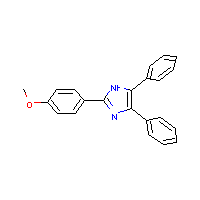

In [2]:
IPythonConsole.ipython_useSVG = True
# SDF読み込み エラーは気にしない
df = PandasTools.LoadSDF( "cas_4337.sdf" )
df.head(1)

 分子を1から1024までの数値のベクトルとして表現します。自然言語処理で言うところの分かち書き〜インデックス化のようなイメージ

In [4]:
fps = [ list(AllChem.GetMorganFingerprintAsBitVect( mol,2, nBits=1024 ).GetOnBits()) for mol in df.ROMol  ]
# 一番長いベクトルの長さを確認します
print( max([ len(i) for i in fps ]))

156


In [5]:
# pad_sequencesはon bitsの長さが揃ってない行列を一定の長さに変換します。
# to_categoricalは ポジネガのクラスを二次元0，1の行列に変換します。
# さっきの例で156でしたのでとりあえず500くらいにします。（根拠はありません）
fpsconv = sequence.pad_sequences( fps, maxlen=500 )
# Amesがmutagenか否かを0,1のビットで表現します。
df['response'] = np.where(df["Ames test categorisation"]=='mutagen', 1, 0)
res = df["response"]
# to_categoricalをつかうと
# 0 => [1,0]また、1 = > [0,1]のようにインデックスをone-hotベクトルとして表現できます
res2 = np_utils.to_categorical( res )
# これで化合物数x500の入力データができました。今回はこの後でデータを分割するので
print(fpsconv.shape)

(4337, 500)


In [6]:
# scikit-learnのメソッドでトレーニングとテストデータに分割します。
trainx, testx, trainy, testy = train_test_split( fpsconv,
                                                 res2,
                                                 test_size=0.1,
                                                 random_state=123 )

In [7]:
print(trainx.shape, testx.shape)
print(trainy.shape, testy.shape)

(3903, 500) (434, 500)
(3903, 2) (434, 2)


In [33]:
# モデルを作ります。
# 一次元のCNNを行いたいの最初の層は埋め込みを行います。ここはword embeddingと同じアプローチを取ります。
# 畳み込みは画像分類や文書解析では非常にいい結果を出しますが、分子の場合インデックスの並びが意味を持たないので
# びみょーだと思っています。
# 各ビットのインデックスをベクトルとして表現します。
# 1024 bitで分子を表現します。input_dimは1024（最初のビットの設定）とします。
# outputdimは64としました。
# input_lengthはさっきpaddingした値なので500（ベクトルが持ってる次元数）となります。
earlystop = EarlyStopping( monitor='loss' )
# remote monitorを使うにはhttps://github.com/fchollet/hualosをcloneして
# api.pyを起動しておくんだってばよ。

monitor = RemoteMonitor( root='http://localhost:9000'  )
model = Sequential()
model.add(  Embedding( 1024, 32, input_length=500 ))

# model.compile( "rmsprop","mse")
# outtest = model.predict( trainx )
# outtest.shape
# (3903, 500, 64)のマトリックスになります。


model.add( Convolution1D( nb_filter=5,
                          filter_length=10, 
                          input_length = 500,
                          ))


In [34]:
# 活性化関数はとりあえずsigmoid
model.add( Activation('sigmoid') )
# pooling層はmaxpoolingとしています。根拠はありませんW
# 最後は二次元の０１のベクトルなんで２とします。
model.add( GlobalMaxPooling1D() )
model.add( Dense( 2 ) )

In [35]:
model.add( Activation( "softmax" ) )

In [36]:
model.compile( optimizer="adadelta",
               loss="categorical_crossentropy",
               metrics = ["accuracy"],
               )

In [37]:
# では学習しましょう epochは時間がかかるので適当にちっちゃくしてください　お茶でも飲むかウェブでも見ましょうか。
hist = model.fit(trainx,trainy,
                 nb_epoch=20, 
                 batch_size=100,
                 callbacks=[  earlystop ]
                )

Epoch 1/20
3903/3903 [==============================] - 7s - loss: 0.6914 - acc: 0.5544     
Epoch 2/20
3903/3903 [==============================] - 7s - loss: 0.6884 - acc: 0.5544     
Epoch 3/20
3903/3903 [==============================] - 7s - loss: 0.6869 - acc: 0.5544     
Epoch 4/20
3903/3903 [==============================] - 7s - loss: 0.6858 - acc: 0.5544     
Epoch 5/20
3903/3903 [==============================] - 7s - loss: 0.6847 - acc: 0.5544     
Epoch 6/20
3903/3903 [==============================] - 7s - loss: 0.6836 - acc: 0.5544     
Epoch 7/20
3903/3903 [==============================] - 7s - loss: 0.6822 - acc: 0.5544     
Epoch 8/20
3903/3903 [==============================] - 7s - loss: 0.6807 - acc: 0.5544     
Epoch 9/20
3903/3903 [==============================] - 7s - loss: 0.6788 - acc: 0.5544     
Epoch 10/20
3903/3903 [==============================] - 7s - loss: 0.6766 - acc: 0.5544     
Epoch 11/20
3903/3903 [==============================] - 7s - loss: 0

In [38]:
# 結果を確認します。
# predict_classesで分類として結果を取得します。

pred_y = model.predict_classes( testx )
test_y_class = [ np.argmax(i) for i in testy ]
from sklearn.metrics import confusion_matrix, classification_report

434/434 [==============================] - 0s     


In [39]:
confusion_matrix( test_y_class, pred_y)

array([[ 30, 167],
       [  2, 235]])

In [40]:
print( classification_report(test_y_class, pred_y) )

             precision    recall  f1-score   support

          0       0.94      0.15      0.26       197
          1       0.58      0.99      0.74       237

avg / total       0.74      0.61      0.52       434



In [41]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
acc = hist.history[ 'acc' ]

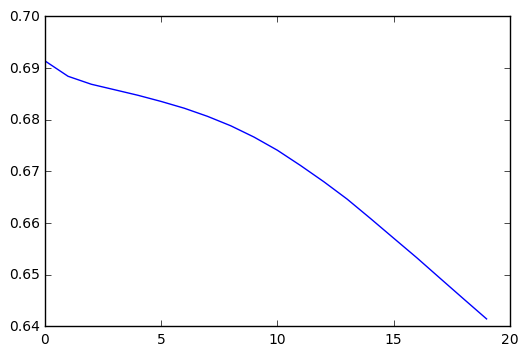

In [42]:
plt.plot( range(len(loss)), loss, label='loss' )

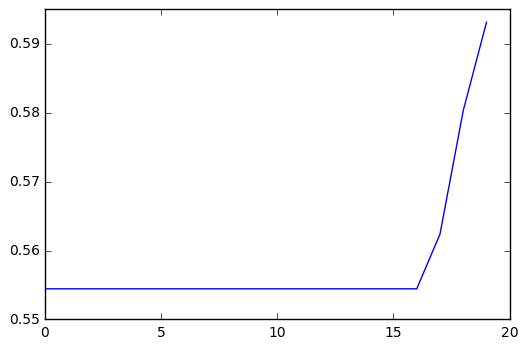

In [43]:
plt.plot( range(len(acc)), acc, label='acc' )